In [ ]:
import itertools

def sums(matrix):  #pour affecter les workers dans les machines 
    l=[]
    v = [0, 1, 2]
    vv = v
    pos = 1
    sum = 0
    for i in range(3):
        sum += matrix[i][vv[i]]
    d = {}
    pos += 1
    vv = list(itertools.permutations(vv))
    for val in vv:
        sum = 0
        for i in range(3):
            sum += matrix[i][val[i]]
        d[val] = sum
        l+=[sum]
        a = min(d, key=d.get)
        pos += 1
    return min(l), a #retourne valeur minimale de job et affectation des workers

In [ ]:
import random

random_list = [[random.sample(range(0,9),3) for _ in range(3)] for _ in range(4)]
print(random_list)

[[[8, 1, 7], [3, 8, 4], [5, 1, 3]], [[2, 6, 8], [8, 1, 2], [3, 6, 5]], [[4, 2, 0], [2, 1, 6], [4, 8, 5]], [[1, 5, 2], [2, 5, 4], [6, 8, 1]]]


In [ ]:
def calculate_makespan(matrix,factory, permutation):
  somme = 0
  if len(factory) == 1:  #si on a un seul job dans le factory
    x=matrix[factory[0]][0][permutation[0]]
    y=matrix[factory[0]][1][permutation[1]]
    z=matrix[factory[0]][2][permutation[2]]
    somme =x+y+z
  else:
    somme = matrix[factory[0]][0][permutation[0]]
    for i in range(len(factory)):
      for j in range(i+1,len(factory)):
        for k in range(1,len(permutation)):
          a = matrix[factory[i]][k][permutation[k]]
          b = matrix[factory[j]][k-1][permutation[k-1]]
          if a>=b :
            somme += a
          else:
            somme += b
            if k < len(permutation) -1:
              matrix[factory[i]][k+1][permutation[k+1]] -= b-a
            else:
              somme += matrix[factory[j]][k][permutation[k]]
  return somme


In [ ]:
def neh (matrix,jobs):
    d={}
    l=[i for i in range(jobs)]
    for i in range(jobs) :
        d[i],l[i]=sums(matrix[i]) #clé : nombre de job , valeur : valeur minimale
    S1 = sorted(d.items(), key=lambda x: x[1], reverse=True) #dictionnaire sorted
    print("S1:",S1)
    S = [i[0]  for i in S1 ] # liste des jobs 
    F1 = [S[0]]
    F2 = [S[1]]
    a1 = l[S[0]] #  affetctation des workers
    a2 = l[S[1]]
    for j in range(2,len(S)):
        v = calculate_makespan(matrix,F1,a1)
        w = calculate_makespan(matrix,F2,a2)
        if v < w : 
          F1.append(S[j])
        else :
          F2.append(S[j])
    print("F1: ",F1,calculate_makespan(matrix,F1,a1))
    print("F2: ",F2,calculate_makespan(matrix,F2,a2))
    d = dict()
    d["F1"] = (F1, a1, calculate_makespan(matrix,F1,a1))
    d["F2"] = (F2, a2, calculate_makespan(matrix,F2,a2))
    return d


In [ ]:
matrix = [[[4, 3, 9], [3, 4, 5], [7, 4, 2]],[[9, 4, 7], [6, 10, 4], [8, 7, 1]],[[7, 9, 8], [8, 3, 7], [9, 6, 4]],[[7,4,6],[6,5,7],[9,5,2]]]
matrix

[[[4, 3, 9], [3, 4, 5], [7, 4, 2]],
 [[9, 4, 7], [6, 10, 4], [8, 7, 1]],
 [[7, 9, 8], [8, 3, 7], [9, 6, 4]],
 [[7, 4, 6], [6, 5, 7], [9, 5, 2]]]

In [ ]:
neh(random_list,4)

S1: [(1, 8), (0, 7), (3, 7), (2, 5)]
F1:  [1, 2] 8
F2:  [0, 3] 9


{'F1': ([1, 2], (0, 1, 2), 12), 'F2': ([0, 3], (1, 0, 2), 9)}

In [ ]:
m = [[4, 3, 9], [3, 4, 5], [7, 4, 2]]
sums(m)


(8, (1, 0, 2))

In [ ]:
matrix

[[[4, 3, 9], [3, 4, 5], [7, 4, 2]],
 [[9, 4, 7], [6, 10, 4], [8, 7, 1]],
 [[7, 9, 8], [8, 3, 7], [9, 6, 2]],
 [[7, 4, 6], [6, 5, 7], [9, 5, 2]]]

### **Diagramme de Gantt**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
def generate(a, b):
    c= [0]
    d = [a[0]]
    for i in range(len(a)-1):
        c.append(c[-1] + a[i])
    for i in range(len(b)-1):
        d.append(d[-1] + b[i])
    return c,d

a = [7, 3, 4]
b = [4, 4, 2]
generate(a, b)

([0, 7, 10], [7, 11, 15])

S1: [(2, 14), (3, 12), (1, 11), (0, 8)]
F1:  [2, 0] 17
F2:  [3, 1] 17


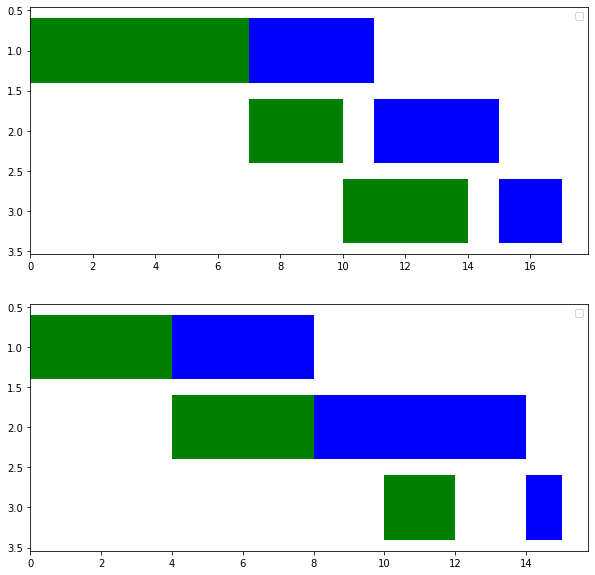

In [ ]:
d = neh(matrix, 4)
matrix = [[[4, 3, 9], [3, 4, 5], [7, 4, 2]],[[9, 4, 7], [6, 10, 4], [8, 7, 1]],[[7, 9, 8], [8, 3, 7], [9, 6, 4]],[[7,4,6],[6,5,7],[9,5,2]]]
plt.figure(figsize=(10, 10))
l2 = [1,2,3]
for i, fac in enumerate(d.keys()):
  plt.subplot(2, 1, i+1)
  process_time = list()
  l1= []
  for j in d[fac][0]:
    l = matrix[j]
    workers = d[fac][1]
    process_time = [x[worker] for worker, x in zip(workers, l)]
    l1.append(process_time)
  T = generate(l1[0], l1[1])
  plt.barh(y = l2, width= l1[0], left = T[0], color='green')
  plt.barh(y = l2, width= l1[1], left = T[1], color='blue')
  plt.gca().invert_yaxis()
  plt.legend()
